**Book** **Recommendation** **System**

A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

**Loading in data**

In [2]:
dataset = pd.read_csv('ratings.csv')

In [3]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
dataset.shape

(981756, 3)

In [5]:
dataset = dataset[:100000]

In [6]:
dataset.shape

(100000, 3)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [8]:
train.head()

,book_id,user_id,rating
75220,753,14817,3
48955,490,18493,4
44966,450,35765,5
13568,136,26718,3
92727,928,21744,4


In [9]:
test.head()

,book_id,user_id,rating
75721,758,8286,3
80184,802,42355,4
19864,199,32419,4
76699,768,3122,5
92991,930,49988,4


In [10]:
n_users = len(dataset.user_id.unique())
n_users

6248

In [11]:
n_books = len(dataset.book_id.unique())
n_books

1001

**Creating dot product model**

Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [12]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [13]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
    model.save('regression_model.h5')

In [14]:
model.evaluate([test.user_id, test.book_id], test.rating)

625/625 [==============================] - 1s 2ms/step - loss: 0.7851


0.7850635051727295

In [15]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 151ms/step
[3.213038] 3
[4.2987742] 4
[3.5929399] 4
[3.9963813] 5
[3.3765264] 4
[4.0528283] 5
[5.1037] 5
[3.141142] 3
[4.0136786] 3
[2.9583042] 3


[None, None, None, None, None, None, None, None, None, None]

**Creating Neural Network**

Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [16]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

In [17]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [18]:
model2.evaluate([test.user_id, test.book_id], test.rating)

625/625 [==============================] - 1s 2ms/step - loss: 0.6970


0.6970178484916687

In [19]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 81ms/step
[3.6509771] 3
[4.280737] 4
[3.7126198] 4
[3.9024696] 5
[3.426157] 4
[4.100355] 5
[4.439163] 5
[3.3397326] 3
[4.009732] 3
[2.9561262] 3


[None, None, None, None, None, None, None, None, None, None]

**Visualizing Embeddings**

Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [20]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [21]:
book_em_weights[:5]

array([[-0.00610029,  0.0156836 ,  0.03038192,  0.0425691 , -0.02896588],
       [-1.5306774 ,  0.5250458 ,  2.366743  ,  1.3422308 , -1.0649071 ],
       [-1.2195548 ,  0.41940942,  2.508028  ,  1.8110565 , -1.1244056 ],
       [-0.5183603 ,  1.0415146 ,  2.5360963 ,  0.71309656, -1.3203545 ],
       [-1.3798604 , -0.9113507 ,  1.9190255 ,  1.5787991 ,  0.7250671 ]],
      dtype=float32)

<Axes: >

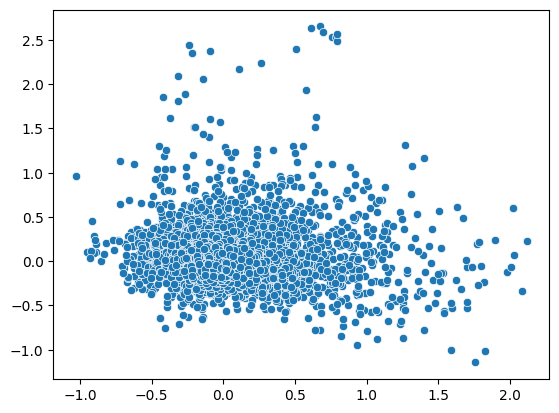

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [23]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0

<Axes: >

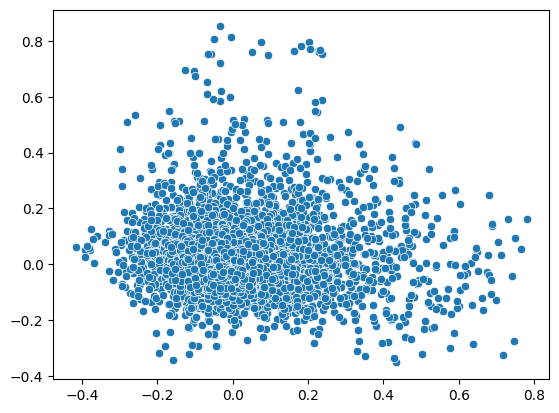

In [24]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.009s...
[t-SNE] Computed neighbors for 10001 samples in 0.641s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.018763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.164688
[t-SNE] KL

<Axes: >

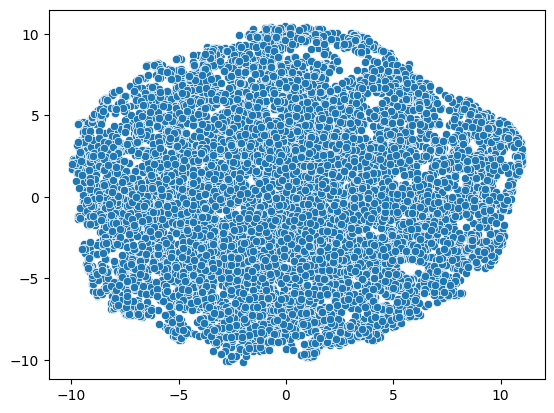

In [26]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

**Making Recommendations**

In [27]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [28]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [29]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

32/32 [==============================] - 0s 1ms/step


array([708, 232, 443, 124, 779])

In [30]:
# print predicted scores
predictions[recommended_book_ids]

array([4.5842924, 4.5406   , 4.5023565, 4.435463 , 4.4201007],
      dtype=float32)

In [31]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [32]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
123,124,7937843,7937843,9585076,151,316098337,9.780316e+12,Emma Donoghue,2010.0,Room,...,511360,556327,42254,11020,26079,99831,217995,201402,https://images.gr-assets.com/books/1344265419m...,https://images.gr-assets.com/books/1344265419s...
231,232,43615,43615,46575,213,452284694,9.780452e+12,Stephen King,1982.0,The Gunslinger,...,332494,366377,13014,9958,24111,72736,112895,146677,https://images.gr-assets.com/books/1375776480m...,https://images.gr-assets.com/books/1375776480s...
442,443,51738,51738,1032901,61,670061050,9.780670e+12,Sarah Dessen,2006.0,Just Listen,...,202180,207930,7319,3665,10143,40684,68323,85115,https://images.gr-assets.com/books/1358270741m...,https://images.gr-assets.com/books/1358270741s...
707,708,1430,1430,1950213,194,60589280,9.780061e+12,"Paulo Coelho, Margaret Jull Costa",2003.0,Onze minutos,...,102206,116141,5444,4444,11306,31202,38487,30702,https://images.gr-assets.com/books/1358266987m...,https://images.gr-assets.com/books/1358266987s...
778,779,5211,5211,865827,79,140003065X,9.781400e+12,Rohinton Mistry,1996.0,A Fine Balance,...,99252,104516,7227,1477,3066,11254,31034,57685,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
